# **MBA - Aula ao Vivo 03**

**Disciplina: Visão Computacional**

**prof: Sérgio Assunção Monteiro, DSc**


# **Exemplos Simples**

In [ ]:
import numpy as np

vetor = np.array([1, 2, 3, 4, 5])
print(vetor)

[1 2 3 4 5]


In [ ]:
vetor = np.pad(vetor,(3, 2), 'constant', constant_values=(77, 99))
  
print(vetor)

[77 77 77  1  2  3  4  5 99 99]


In [ ]:
vetor = np.pad(vetor,(3, 2), 'constant')
  
print(vetor)

[ 0  0  0 77 77 77  1  2  3  4  5 99 99  0  0]


In [ ]:
import numpy as np
  
vetor_orig = [[1, 2],[3, 4]] 
vetor_pad = np.pad(vetor_orig, ((0,0),(1,1)), 'constant')
print(vetor_pad)

[[0 1 2 0]
 [0 3 4 0]]


# **Redes CNN**

**Carregar os Dados**

In [ ]:
import tensorflow as tf

(x_treino, y_treino), (x_teste, y_teste) = tf.keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


**Visualizar Dados**

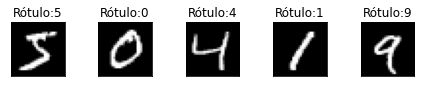

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_treino[i].reshape(28, 28), cmap='gray')
  plt.title('Rótulo:{}'.format(y_treino[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

**Separação dos conjuntos**

In [ ]:
import numpy as np
quantidade_dados_treino = 55000

x_validacao = x_treino[quantidade_dados_treino:, ..., np.newaxis]
y_validacao = y_treino[quantidade_dados_treino:]

x_treino = x_treino[:quantidade_dados_treino, ..., np.newaxis]
y_treino = y_treino[:quantidade_dados_treino]

x_teste =  x_teste[..., np.newaxis]

print("Formato da Imagem: {}".format(x_treino[0].shape), end = '\n\n')
print("Conjunto de Treinamento: {} registros".format(len(x_treino)))
print("Conjunto de Validação:   {} registros".format(len(x_validacao)))
print("Conjunto de Testes:      {} registros".format(len(x_teste)))

Formato da Imagem: (32, 32, 1, 1, 1)

Conjunto de Treinamento: 55000 registros
Conjunto de Validação:   0 registros
Conjunto de Testes:      10000 registros


**A camada de entrada consiste em imagens dimensionais (32 x 32 x 1). Como as imagens têm 28 x 28, elas são preenchidas com 0s para torná-las 32 x 32.**

In [ ]:
x_treino = np.pad(x_treino, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_validacao = np.pad(x_validacao, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_teste = np.pad(x_teste, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Informações sobre as mudanças dos dados de entrada: ", end='\n\n')
print("Conjunto de treinamento: {}".format(x_treino.shape))
print("Conjunto de Validação: {}".format(x_validacao.shape))
print("Conjunto de Testes: {}".format(x_teste.shape))

Informações sobre as mudanças dos dados de entrada: 

Conjunto de treinamento: (55000, 32, 32, 1)
Conjunto de Validação: (5000, 32, 32, 1)
Conjunto de Testes: (10000, 32, 32, 1)


**Normalização dos dados**

In [ ]:
normalizar_dados = lambda t: t/255
x_treino = normalizar_dados(x_treino)
x_validacao = normalizar_dados(x_validacao)
x_teste = normalizar_dados(x_teste)


**Arquitetura LeNet**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def arquitetura_LeNet_5(funcao_ativacao):
    modelo = Sequential()

    # C1: (None,32,32,1) -> (None,28,28,6).
    modelo.add(Conv2D(6, kernel_size=(5, 5), 
                      strides=(1, 1), 
                      activation=funcao_ativacao, 
                      input_shape=(32,32,1), 
                      padding='valid'))

    # P1: (None,28,28,6) -> (None,14,14,6).
    modelo.add(AveragePooling2D(pool_size=(2, 2), 
                                strides=(2, 2), 
                                padding='valid'))

    # C2: (None,14,14,6) -> (None,10,10,16).
    modelo.add(Conv2D(16, kernel_size=(5, 5), 
                      strides=(1, 1), 
                      activation=funcao_ativacao, 
                      padding='valid'))

    # P2: (None,10,10,16) -> (None,5,5,16).
    modelo.add(AveragePooling2D(pool_size=(2, 2), 
                                strides=(2, 2), 
                                padding='valid'))


    modelo.add(Conv2D(120, kernel_size=(1, 1), 
                      strides=(1, 1), 
                      activation='tanh', 
                      padding='valid'))

    # Flatten: (None,5,5,16) -> (None, 120).
    modelo.add(Flatten())

    # FC2: (None,120) -> (None,84).
    modelo.add(Dense(84, activation=funcao_ativacao))

    # FC3: (None,84) -> (None,10).
    modelo.add(Dense(10, activation='softmax'))
    
    return modelo

**Visualizar a Arquitetura do Modelo**

In [ ]:
modelo = arquitetura_LeNet_5('relu')
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 120)         2040      
                                                                 
 flatten (Flatten)           (None, 3000)              0

**Treinamento do modelo**

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy


modelo.compile(loss='sparse_categorical_crossentropy', 
                optimizer='sgd', metrics=['accuracy']) 

quantidade_de_epocas = 10
historico_treinamento = modelo.fit(x_treino, y_treino, 
                                   validation_data=(x_validacao, y_validacao),
                                   batch_size=64, 
                                   epochs=quantidade_de_epocas)
# Salva o modelo
modelo.save("modelo_lenet5")

Epoch 1/10
860/860 [==============================] - 37s 42ms/step - loss: 0.8790 - accuracy: 0.7541 - val_loss: 0.2600 - val_accuracy: 0.9238
Epoch 2/10
860/860 [==============================] - 28s 33ms/step - loss: 0.2799 - accuracy: 0.9135 - val_loss: 0.1768 - val_accuracy: 0.9502
Epoch 3/10
860/860 [==============================] - 29s 33ms/step - loss: 0.2107 - accuracy: 0.9356 - val_loss: 0.1550 - val_accuracy: 0.9540
Epoch 4/10
860/860 [==============================] - 28s 33ms/step - loss: 0.1706 - accuracy: 0.9482 - val_loss: 0.1431 - val_accuracy: 0.9594
Epoch 5/10
860/860 [==============================] - 28s 33ms/step - loss: 0.1445 - accuracy: 0.9556 - val_loss: 0.1148 - val_accuracy: 0.9680
Epoch 6/10
860/860 [==============================] - 29s 33ms/step - loss: 0.1259 - accuracy: 0.9609 - val_loss: 0.0938 - val_accuracy: 0.9726
Epoch 7/10
860/860 [==============================] - 30s 35ms/step - loss: 0.1109 - accuracy: 0.9655 - val_loss: 0.0953 - val_accuracy:

**Avaliar o Modelo**

In [ ]:
loss, accuracy = modelo.evaluate(x_teste, y_teste,batch_size=64);
print("loss:{}".format(loss))
print("accuracy:{}".format(accuracy))

157/157 [==============================] - 2s 13ms/step - loss: 0.0774 - accuracy: 0.9755
loss:0.07739216834306717
accuracy:0.9754999876022339


**Predição de dados**

Predição: [4.53098110e-05 6.80970086e-04 1.32911824e-04 9.70586002e-01
 6.97281308e-08 2.69385930e-02 1.03991695e-08 1.11929537e-03
 1.19984594e-04 3.76867130e-04]

Nosso modelo CNN prevê que o dígito na imagem é: 3


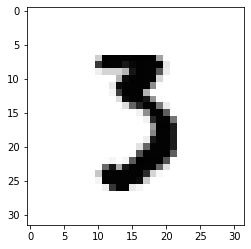

In [ ]:
indice_imagem = 1976

predicao = modelo.predict(x_teste[indice_imagem].reshape(1,32,32,1))

print("Predição: {}".format(predicao[0]), end = '\n\n')

print("Nosso modelo CNN prevê que o dígito na imagem é:", predicao.argmax())
plt.imshow(x_teste[indice_imagem].reshape(32,32), cmap='Greys')


**Imprimir Treinamento**

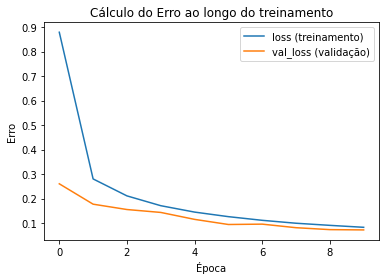

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')

plt.plot(historico_treinamento.history['loss'])
plt.plot(historico_treinamento.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

# **Visão Computacional YOLO**

**Rodar no Desktop**

In [ ]:
import cv2

In [ ]:
def ler_imagem(nome_arquivo):
    imagem = cv2.imread("Imagens/"+str(nome_arquivo))
    return imagem

In [ ]:
def carregar_classes():
    with open('yolov/coco.names', 'r') as f:
        classes = f.read().splitlines()
    return classes

In [ ]:
def carregar_dnn():
    rede = cv2.dnn.readNetFromDarknet('yolov/yolov4.cfg',
                                      'yolov/yolov4.weights')
    modelo = cv2.dnn_DetectionModel(rede)
    modelo.setInputParams(scale=1 / 255,
                          size=(416, 416),
                          swapRB=True)
    return modelo

In [ ]:
def reconhecer_objetos(modelo, classes, imagem):
    classIds, scores, boxes = modelo.detect(imagem,
                                            confThreshold=0.55,
                                            nmsThreshold=0.45)
    for (classId, score, box) in zip(classIds, scores, boxes):
        cv2.rectangle(imagem,
                      (box[0], box[1]),
                      (box[0] + box[2], box[1] + box[3]),
                      color=(0, 255, 0), thickness=2)
        texto = '%s: %.2f' % (classes[classId], score)
        cv2.putText(imagem, texto,
                    (box[0], box[1] - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 1,
                    color=(0, 255, 0), thickness=2)
    return imagem

In [ ]:
def processar_imagem(nome_arquivo):
    imagem = ler_imagem(nome_arquivo)
    classes = carregar_classes()
    modelo = carregar_dnn()
    imagem = reconhecer_objetos(modelo, classes, imagem)
    cv2.imshow('Imagem', imagem)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
if __name__ == '__main__':
    nome_arquivo = "foto_01.jpg"
    processar_imagem(nome_arquivo)